In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df=pd.read_csv('C:/Users/NOVATEC/Desktop/business_yelp.csv', sep=',', encoding='latin1')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       145219 non-null  object 
 3   city          150346 non-null  object 
 4   state         150343 non-null  object 
 5   postal_code   150273 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  categories    150243 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 12.6+ MB


In [41]:
df['stars'].describe()

count    150346.000000
mean          3.596724
std           0.974421
min           1.000000
25%           3.000000
50%           3.500000
75%           4.500000
max           5.000000
Name: stars, dtype: float64

In [42]:
df['review_count'].describe()

count    150346.000000
mean         44.866561
std         121.120136
min           5.000000
25%           8.000000
50%          15.000000
75%          37.000000
max        7568.000000
Name: review_count, dtype: float64

Detección de outliers

Se crea una función para detectar outliers dentro de nuestras variables numéricas.

In [43]:
def outlier(df, columns):
    outliers=pd.DataFrame()
    for i in columns:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        lo=Q1 - 1.5 * IQR
        up=Q3 + 1.5 * IQR
        outliers[i]=df[i][(df[i]<lo) | (df[i]>up)]
    return outliers

En nuestras dos variables numéricas, se tienen más del 5% de valores considerados outliers, por lo que en esta ocasión no podemos eliminarlos y por ende, vamos a trabajar con la presencia de los mismos. En el caso de la columna stars, no se encuentran outliers

In [44]:
columna=['stars']
o=outlier(df,columna)
o

,stars


In [45]:
columna=['review_count']
o=outlier(df,columna)
o

,review_count
14,100
15,245
19,205
23,339
27,161
...,...
150285,448
150290,299
150296,142
150322,204


Gráficos

Para comenzar con la visualización de datos, tenemos un histograma en donde se observan las distribuciones para el promedio de estrellas 'stars', vemos que la mayoría se encuentra entre 3.5 y 4.5.

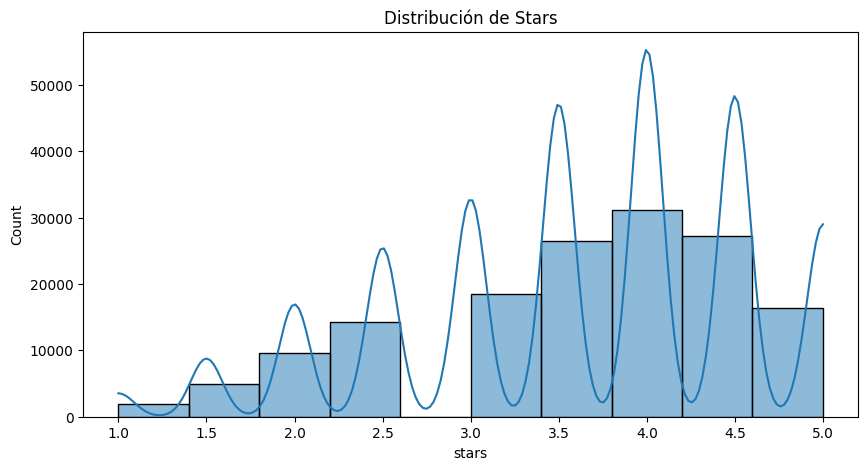

In [46]:
plt.figure(figsize=(10, 5))
sns.histplot(df['stars'], bins=10, kde=True)
plt.title('Distribución de Stars')
plt.show()

Para el caso de 'review_count', se observa que la mayoria de los valores están en rangos pequeños mientras existen filas con valores ceranos a 1000, esto es debido a la presencia de outliers que por la cantidad de porcentaje que representan no los podemos eiminiar

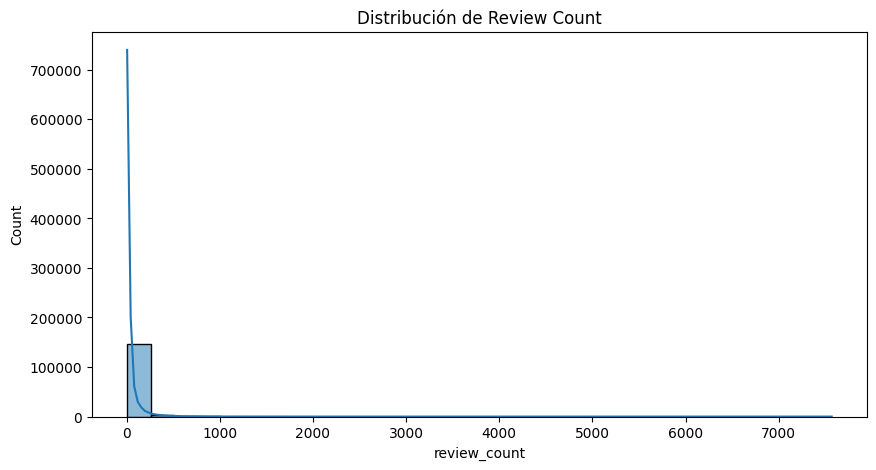

In [47]:
plt.figure(figsize=(10, 5))
sns.histplot(df['review_count'], bins=30, kde=True)
plt.title('Distribución de Review Count')
plt.show()

Ahora geográficamente hablando, Pensilvania es el estado que mayor número de negocios presenta segudio de Florida, lo que nos habla de un registro de mayo presencia de esos dos estados y/o que la mayor parte de las reviews provengan de esos dos.

C:\Users\NOVATEC\AppData\Local\Temp\ipykernel_14528\2102784963.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')


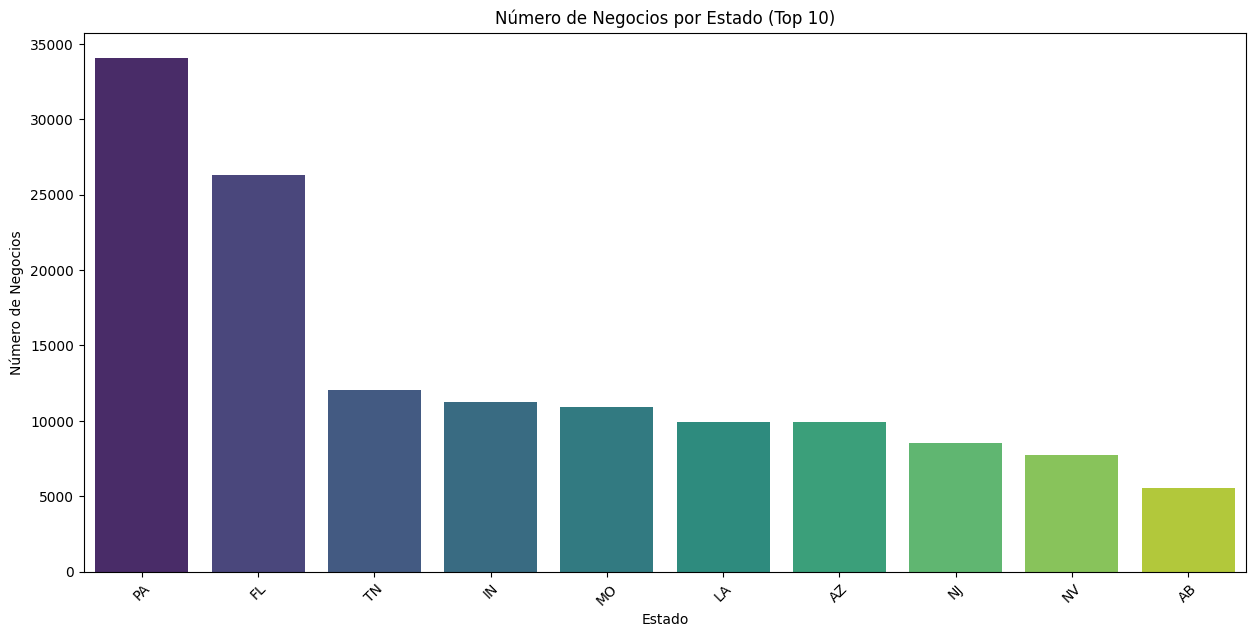

In [81]:
state_counts=df['state'].value_counts().nlargest(10)

plt.figure(figsize=(15, 7))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.title('Número de Negocios por Estado (Top 10)')
plt.xlabel('Estado')
plt.ylabel('Número de Negocios')
plt.xticks(rotation=45)
plt.show()

Hablando de las categorías, Restaurants es la más frecuente dentro de nuestro dataset, lo cual va de la mano con el análisis hecho en la data de Google

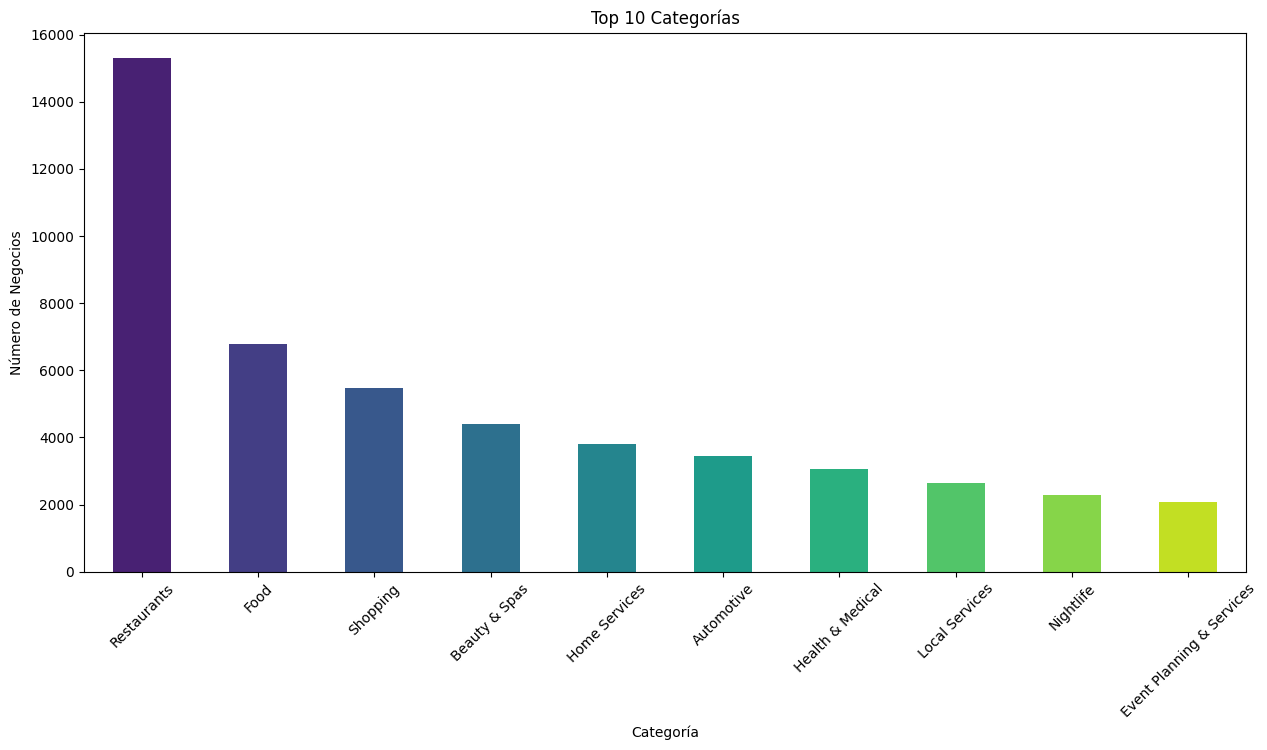

In [82]:
colors = sns.color_palette("viridis", 10)

plt.figure(figsize=(15, 7))
df['categories'].value_counts().nlargest(10).plot(kind='bar', color=colors)
plt.title('Top 10 Categorías')
plt.xlabel('Categoría')
plt.ylabel('Número de Negocios')
plt.xticks(rotation=45)
plt.show()

En este boxplot observamos la nula presencia de outliers y cómo algunos estados acaparan la mayoría de los registros y que también la mayoría tiene un rating 'stars' entre 3 y 4.5

C:\Users\NOVATEC\AppData\Local\Temp\ipykernel_14528\1088520362.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='state', y='stars', data=df, palette='Spectral')


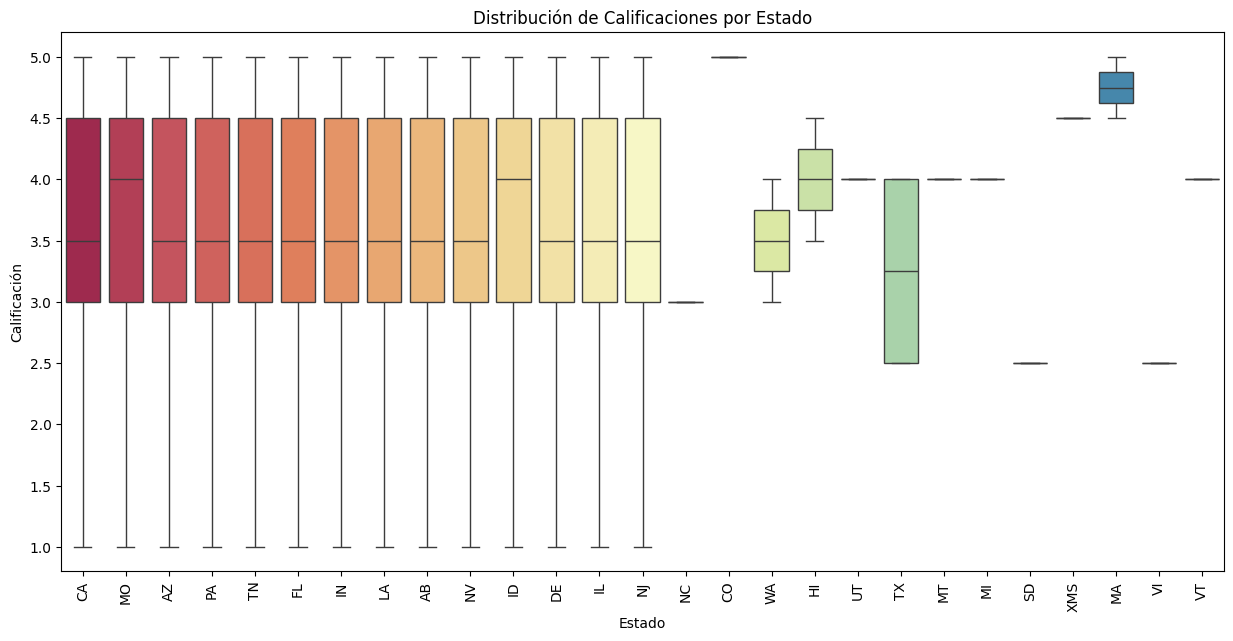

In [83]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='state', y='stars', data=df, palette='Spectral')
plt.title('Distribución de Calificaciones por Estado')
plt.xlabel('Estado')
plt.ylabel('Calificación')
plt.xticks(rotation=90)
plt.show()

Y para 'review_count' se pueden ver los outliers mencionados y que practicamente tiene mayor presencia en esta variable

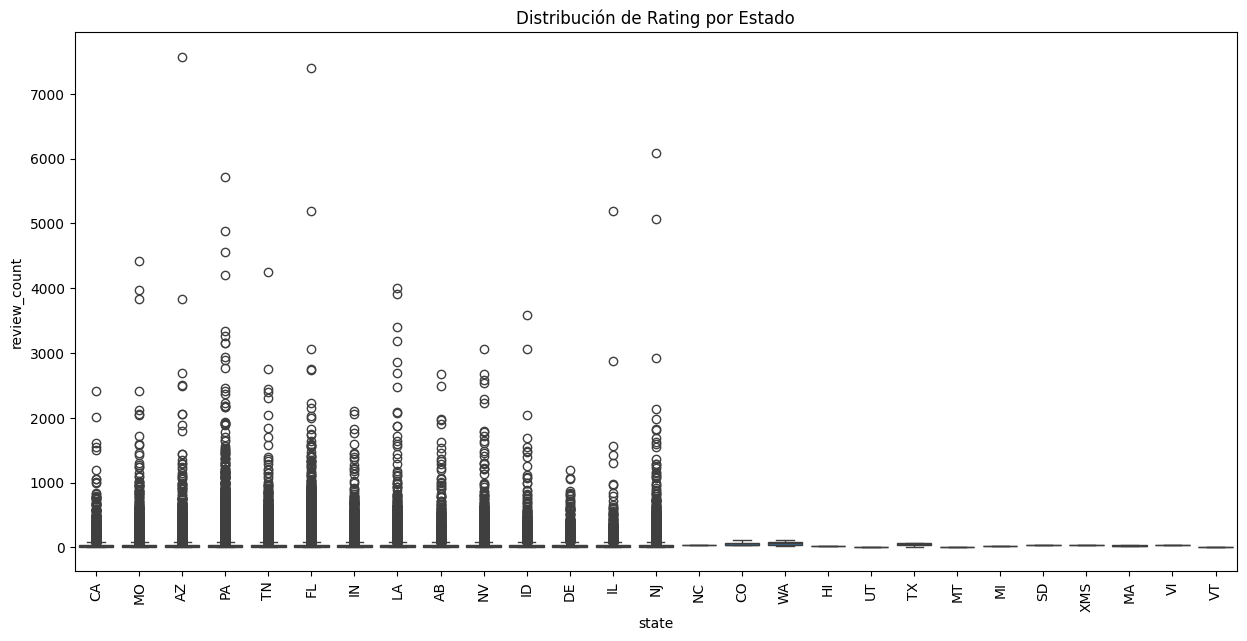

In [55]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='state', y='review_count', data=df)
plt.title('Distribución de Rating por Estado')
plt.xticks(rotation=90)
plt.show()

Ahora vemos el promedio de rating por estado, en donde si retomamos los dos estados con mayor número de reseñas, Pensilvania y Florida, no son los más altos a diferencia de Colorado y Massachusets, esto puede ser debido a que estos dos últimos al tener menor frecuencia no tienden a bajar su promedio y sus calificaciones son altas.

C:\Users\NOVATEC\AppData\Local\Temp\ipykernel_14528\2464013539.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_stars_by_state.index, y=avg_stars_by_state.values, palette='coolwarm')


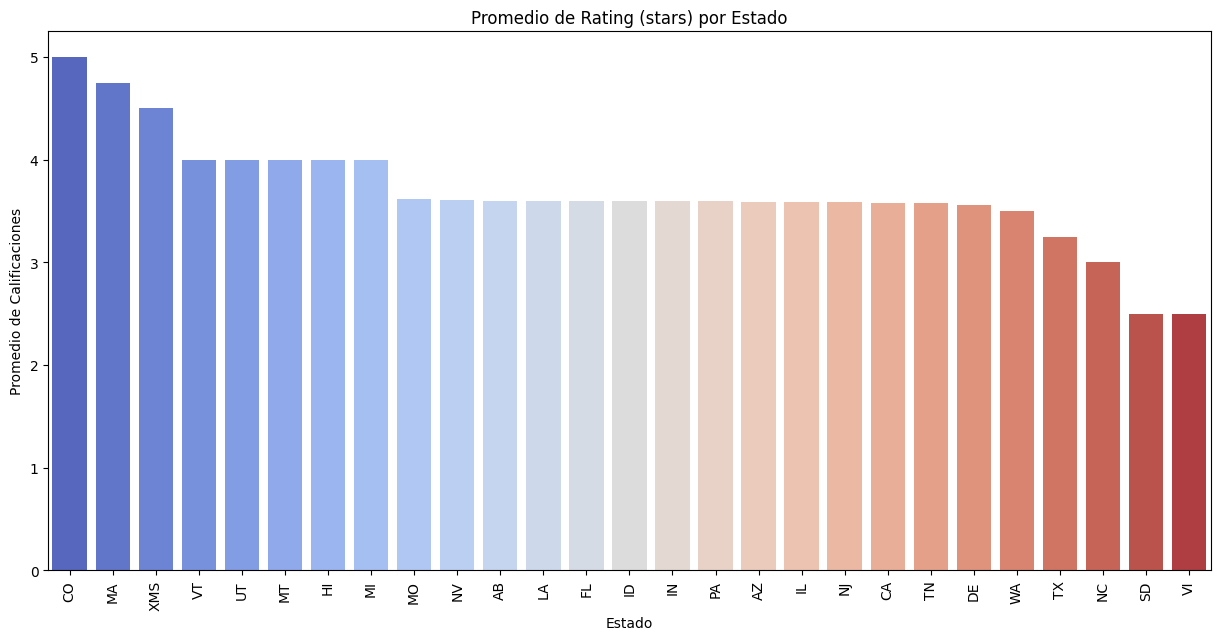

In [84]:
avg_stars_by_state=df.groupby('state')['stars'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 7))
sns.barplot(x=avg_stars_by_state.index, y=avg_stars_by_state.values, palette='coolwarm')
plt.title('Promedio de Rating (stars) por Estado')
plt.xlabel('Estado')
plt.ylabel('Promedio de Calificaciones')
plt.xticks(rotation=90)
plt.show()

Se observa un grafico de barras con un top 10 de ciudades con mayor frecuencia y reafirma que Pensilavnia tiene el mayor número de negocios/reseñas dentro de nuestra data.

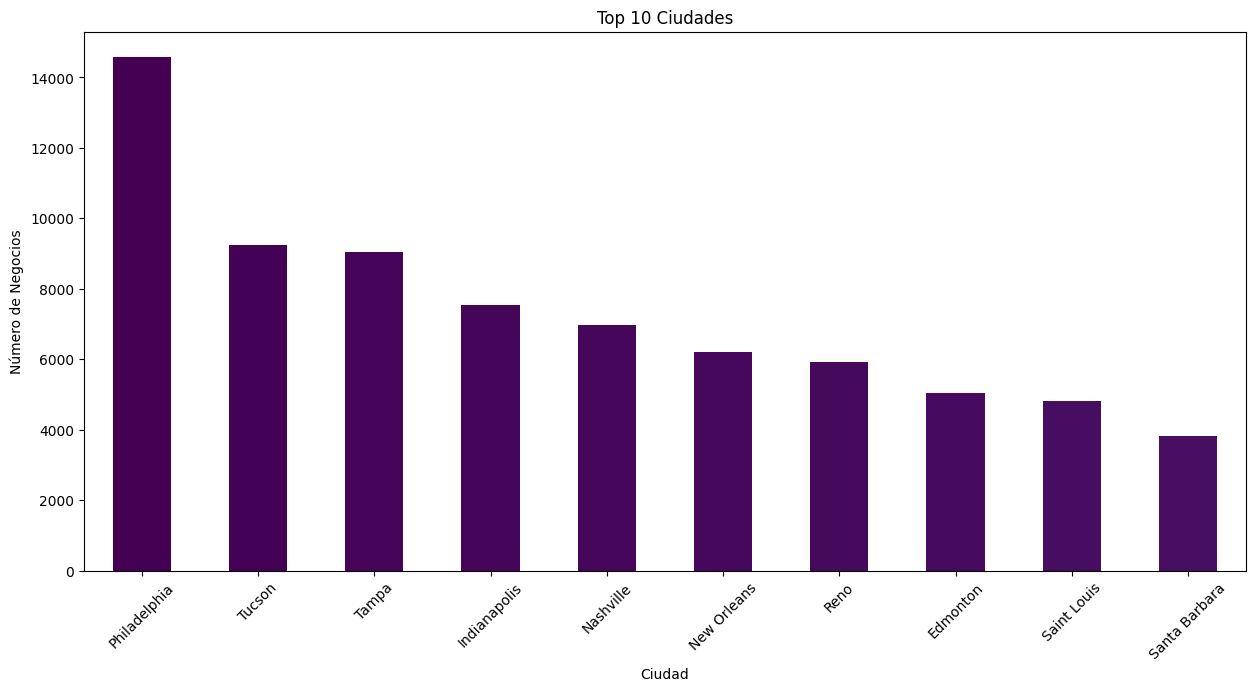

In [85]:
top_cities=df['city'].value_counts().nlargest(10)

plt.figure(figsize=(15, 7))
top_cities.plot(kind='bar', color=plt.cm.viridis(range(len(top_cities))))
plt.title('Top 10 Ciudades')
plt.xlabel('Ciudad')
plt.ylabel('Número de Negocios')
plt.xticks(rotation=45)
plt.show()

En cuanto a distribución por ciudades (Top 10), vemos la presencia de unos pocos outliers que pueden llegar a bajar el promedio de los estados de esas ciudes. Mientras que seguimos viendo la presencia de ciuadades de los estados de Pensilvania y Florida.

C:\Users\NOVATEC\AppData\Local\Temp\ipykernel_14528\1250461096.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='city', y='stars', data=df_top_cities, palette='pastel')


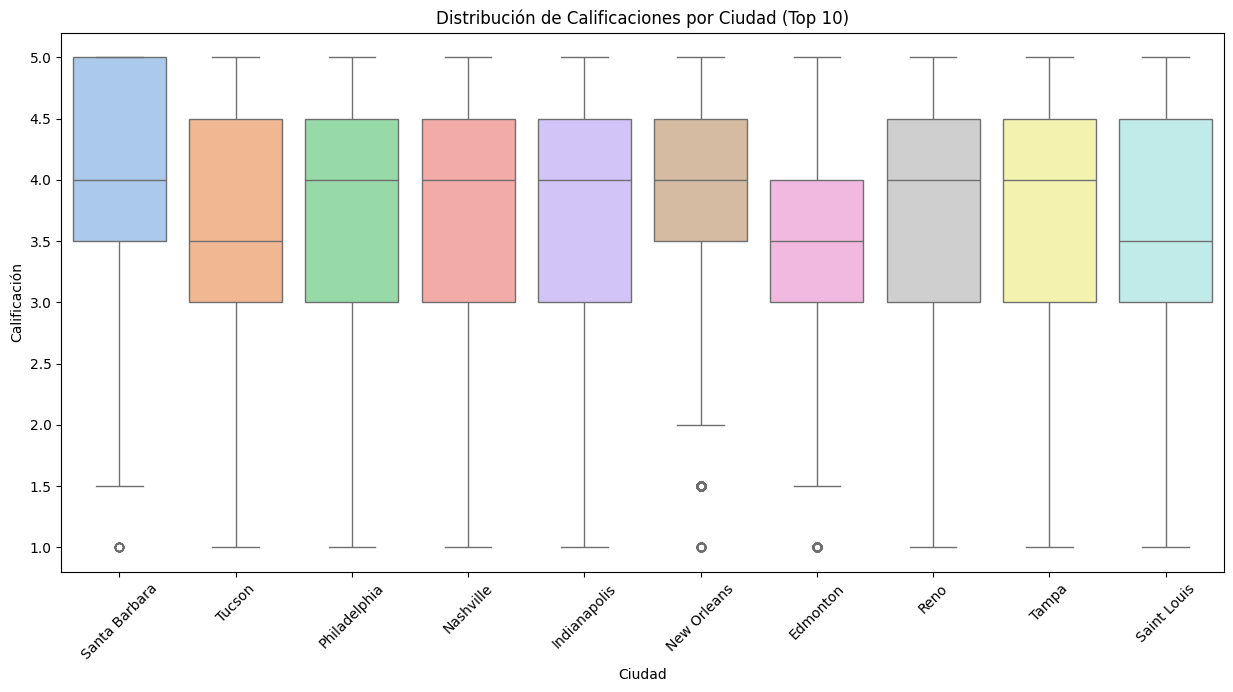

In [86]:
top_cities = df['city'].value_counts().nlargest(10).index
df_top_cities = df[df['city'].isin(top_cities)]

plt.figure(figsize=(15, 7))
sns.boxplot(x='city', y='stars', data=df_top_cities, palette='pastel')
plt.title('Distribución de Calificaciones por Ciudad (Top 10)')
plt.xlabel('Ciudad')
plt.ylabel('Calificación')
plt.xticks(rotation=45)
plt.show()

Por útlimo, tenemos este gráfico en donde se muestra el número de negocios agrupados por categoría y estado, en donde reafirma los gráficos, Pensilvania y Florida siendo los estados con mayor presencia, Restaurants y Foos siendo las categorías más frecuentes y el mismo patrón en esa variable. Es un resuemn de la mayor parte del análisis.

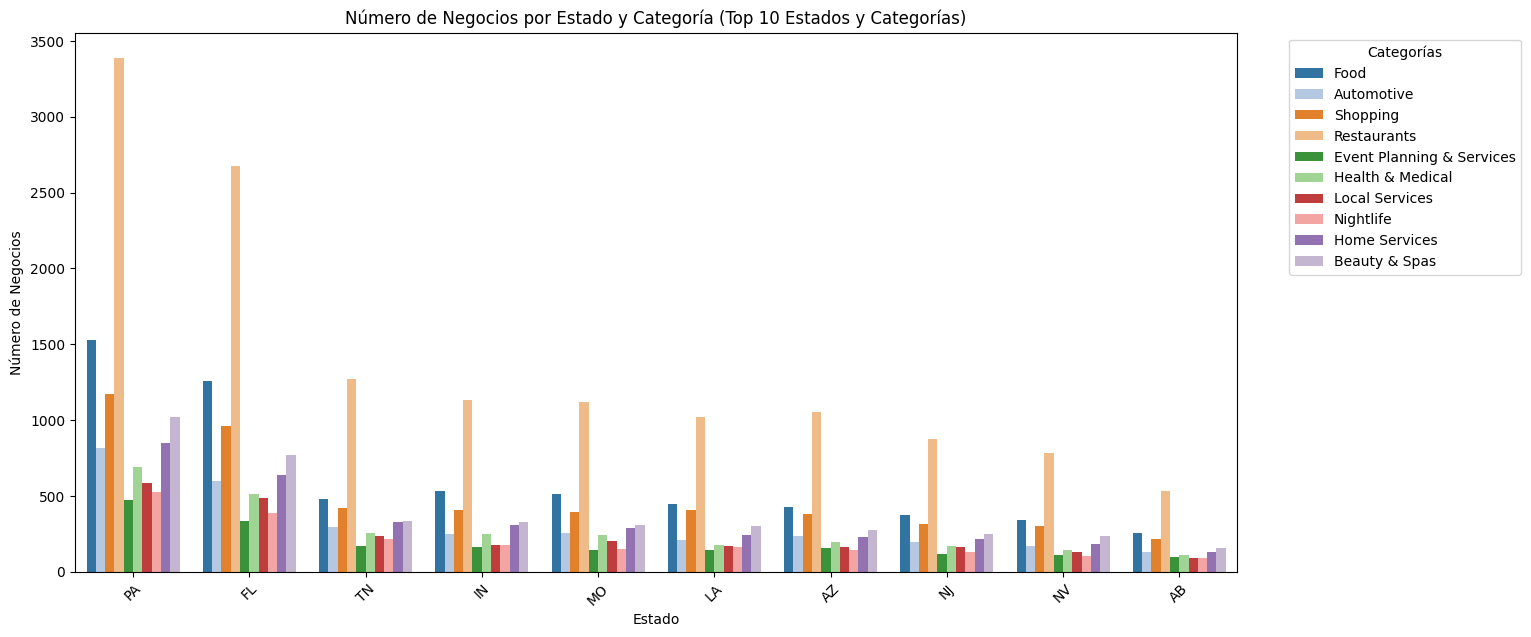

In [80]:
top_states=df['state'].value_counts().nlargest(10).index
df_top_states=df[df['state'].isin(top_states)]
top_categories=df['categories'].value_counts().nlargest(10).index
df_top_states_top_categories=df_top_states[df_top_states['categories'].isin(top_categories)]

plt.figure(figsize=(15, 7))
sns.countplot(x='state', hue='categories', data=df_top_states_top_categories, palette='tab20', order=top_states)
plt.title('Número de Negocios por Estado y Categoría (Top 10 Estados y Categorías)')
plt.xlabel('Estado')
plt.ylabel('Número de Negocios')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Categorías')
plt.show()

Insights

1.- Pensilvania y Florida son los estados con mayor presencia.

2.- Restaurants y Food son las categorías con mayor presencia.

3.- Santa Barbara es la ciudad con mejores califiaciones.

4.- Philadelphia es la ciudad con más calificaciones.

5.- Shopping es una categoría que puede tener mayor presencia en un futuro.

6.- La mayoría de las negocios se encuentran en un rango entre 3.5 y 4.5 de califiación

Conclusiones

Se puede hacer un estudio de mercado en estados con menor presencia de negocios calificados para ver lo que está pasando en ellos, a su vez, también se pueden promocionar mejor categorías como Local Services para que tengan mayor presencia. Hay una ventana de oportunidades en esos estados que tienen menor presencia de negocios para poder colocar establecimientos. En cuanto a los dos estados que tienen mayor número de negocios, esto puede ser debido a que exista una mayor densidad demográfica, también a que los usuarios que visitaron los negocios son los que hayan calificado mientras que en lo que no tenemos mucha densidad, no hayan hecho alguna calificación.